# REGRESION LINEAL DE MOTOS

## Librerías

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns',None)

In [63]:
moto_data = 'byle_data.csv'

In [68]:
df = pd.read_csv(moto_data, sep=',')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


## Verificación de los datos

In [70]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [71]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'kms_driven'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'power'}>]], dtype=object)

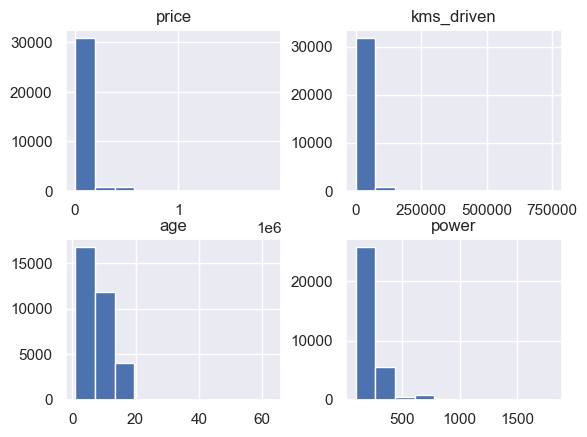

In [72]:
df.hist()

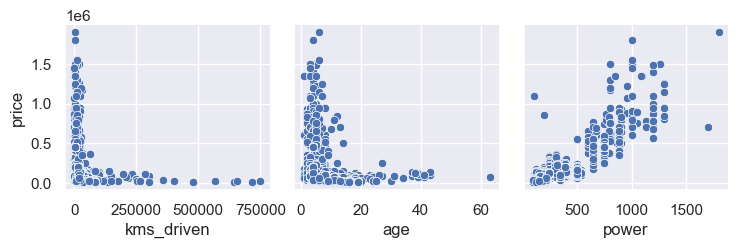

In [73]:
sns.pairplot(df, x_vars=['kms_driven','age','power'], y_vars=['price'])

## CODIFICACION DE ETIQUETAS TIPO OBJETO

In [78]:
from sklearn import preprocessing

# ciclo opara cada columna de la tabla para los datos tipo objeto
for col in df.select_dtypes(include=['object']).columns:
    
    # Iniciand codificación de las datos tipo objetos
    label_encoder = preprocessing.LabelEncoder()
    
    # Ajustando codificación a valores unicos
    label_encoder.fit(df[col].unique())
    
    # transformar la columna usando la codificación
    df[col] = label_encoder.transform(df[col])
    
    # Imprimir las columnas con los valores unicos
    print(f"{col}: {df[col].unique()}")

bike_name: [401 295 411 375 426 437 189 168 326 304 464 432  72  27  31  73  76 339
  84 173 302 429 176 214  56 235   9 257 208 249 215 328 256 323 288  16
 277 140 348 422 329 370 197  89 229 449 333  10 272  65 122 264  50 147
  61 433  20 318 251 313  54  64 431 102 413  79 338 174 253 217  74  88
 337 424 300 242 465 367  86 201 151 165 461  94 312 394 109 315  40  15
 321 199 212 466  68  43 236 349  99 425 344 255  32 167 145 160  93 287
 438 443 146 106 387 365  44 306 135 347 172  46 385 292 399  45 101 298
 396  67 305 231 342 452 325 290  38 457 414 218 238 246  77  78 439 178
 193 336 159 469 285 130 206  53 200 194 228   2  66 259  90 244 113 359
 258 132  70 307 353 379  22 153 463 364 279 380 143  12 310 124 346 128
 356 278 276 195 111 166  36  34 366 210 248  18 123  29  14 400 205 263
  47  91 213  87 241 462 181  95 412 245  80 247 453 402 237 270 121 378
 148 355 468 360 150 299 116 434 211 330 320 119 450 376 138 216 142  63
 261 260  59 161 114 383 324 110  60 252

## Train/Test

In [80]:
datos_entrenamiento = df.sample(frac=0.8,random_state=0)
datos_prueba = df.drop(datos_entrenamiento.index)

In [83]:
etiquetas_entrenamiento = datos_entrenamiento.pop('price')
etiquetas_prueba = datos_prueba.pop('price')

In [84]:
etiquetas_entrenamiento

9763      87000.0
28214     41000.0
24114    450000.0
16697     70000.0
12930    105000.0
           ...   
17549     48000.0
1192      67000.0
14613     35000.0
3690      91100.0
12877     25000.0
Name: price, Length: 26118, dtype: float64

In [86]:
datos_entrenamiento

,bike_name,city,kms_driven,owner,age,power,brand
9763,194,330,140.0,0,3.0,160.0,6
28214,9,118,20245.0,2,11.0,220.0,1
24114,110,211,3430.0,0,4.0,750.0,4
16697,15,282,8000.0,0,5.0,220.0,1
12930,288,118,20000.0,0,4.0,350.0,17
...,...,...,...,...,...,...,...
17549,72,14,41939.0,0,8.0,200.0,1
1192,385,140,21483.0,0,3.0,200.0,19
14613,9,44,60000.0,0,9.0,220.0,1
3690,76,167,18470.0,0,6.0,200.0,1


## Regresion Lineal

In [88]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(datos_entrenamiento,etiquetas_entrenamiento)

LinearRegression()

In [91]:
predicciones = modelo.predict(datos_prueba)
predicciones

array([ 57425.19913001, -10885.55341776,   9100.52591078, ...,
        34301.46638609, 109084.74159597, 112550.20836704])

## Error Porcentual

In [101]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiquetas_prueba, predicciones))
print("Error porcentual : %f" % (error*100))

Error porcentual : 3753224.613063


In [103]:
motorranger = pd.DataFrame(np.array([[45,234,234,3,4,200,5]]),columns=('bike_name','city','kms_driven','owner','age','power','brand'))
motorranger
                           

,bike_name,city,kms_driven,owner,age,power,brand
0,45,234,234,3,4,200,5


In [105]:
modelo.predict(motorranger)

array([1999.12141661])

In [107]:
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,401,35000.0,6,17654.0,0,3.0,110.0,19
1,295,119900.0,118,11000.0,0,4.0,350.0,17
2,411,600000.0,118,110.0,0,8.0,675.0,20
3,375,65000.0,44,16329.0,0,4.0,180.0,19
4,426,80000.0,44,10000.0,0,3.0,150.0,21
...,...,...,...,...,...,...,...,...
32643,151,39000.0,118,22000.0,0,4.0,100.0,5
32644,375,30000.0,224,6639.0,0,9.0,180.0,19
32645,15,60000.0,118,20373.0,0,6.0,220.0,1
32646,176,15600.0,191,84186.0,0,16.0,125.0,5


In [ ]:
### Conclusion: No se debio hacer encoder en las variables categoricas porque no se necesitaba